# 0. Imports

In [106]:
import numpy as np
import scipy as sc
import sympy as sy
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import faker as fk

In [108]:
fake = fk.Faker('pt-BR')
sns.set_theme(style="darkgrid")

# 1. Estatística

Estamos acostumados com eventos determinísticos, ou seja, eventos que ocorrem de forma previsível. Por exemplo, se jogarmos uma moeda para cima sabemos que ela irá cair. No entanto, existem eventos que não são determinísticos, ou seja, não são previsíveis. Por exemplo, se jogarmos um dado, não sabemos qual será o resultado. Podemos ter uma ideia de que a probabilidade de sair um número par é de 50%, mas não sabemos qual será o resultado.

A estatística é a ciência que estuda os eventos não determinísticos. Ela é dividida em duas áreas: estatística descritiva e estatística inferencial. A estatística descritiva é a área que estuda como descrever e resumir os dados. A estatística inferencial é a área que estuda como fazer afirmações a partir de um conjunto de valores representativo sobre um universo.

# 2. Estatística Descritiva

Uma variável é uma característica que pode ser medida em um indivíduo ou objeto. Por exemplo, altura, peso, idade, sexo, cor dos olhos, etc.

Uma variável pode ser classificada em qualitativa ou quantitativa

- Uma variável **qualitativa** é uma variável que não pode ser medida, apenas classificada. Por exemplo, sexo, cor dos olhos, etc.
- Uma variável **quantitativa** é uma variável que pode ser medida. Por exemplo, altura, peso, idade, etc.

Uma variável quantitativa, ou numérica, pode ser classificada em discreta ou contínua

- Uma variável **discreta** é uma variável que pode assumir apenas valores inteiros. Por exemplo, número de filhos, número de carros, etc.
- Uma variável **contínua** é uma variável que pode assumir qualquer valor real. Por exemplo, altura, peso, idade, etc.

Uma variável qualitativa, ou categórica, pode ser classificada em nominal ou ordinal

- Uma variável **nominal** é uma variável que não possui uma ordem natural. Por exemplo, sexo, cor dos olhos, etc.
- Uma variável **ordinal** é uma variável que possui uma ordem natural. Por exemplo, escolaridade, grau de satisfação, etc.

In [94]:
#Criando um dataframe com Polars e features aleatórias representando os tipos de variáveis
df = pl.DataFrame({
    'nome': [fake.name() for _ in range(1000)], #Qualitativo Nominal
    'empregado': [fake.random_int(0, 1) for _ in range(1000)], #Qualitativo Nominal (Binário)
    'escolaridade': [fake.random_element(['fundamental', 'medio', 'superior']) for _ in range(1000)], #Qualitativo Ordinal
    'peso': np.random.normal(loc=80, scale=10.0, size=1000), #Quantitativo Contínuo
    'salario': np.round(np.random.exponential(scale=2000.0, size=1000)+1200,2), #Quantitativo Contínuo
    'n_filhos': [fake.random_int(0, 5) for _ in range(1000)] #Quantitativo Discreto
}).select(
    pl.col('*').exclude('escolaridade', 'empregado'),
    pl.col('escolaridade').cast(pl.Categorical),
    pl.col('empregado').cast(pl.UInt8)
)

df.sample(10)

nome,peso,salario,n_filhos,escolaridade,empregado
str,f64,f64,i64,cat,u8
"""Leonardo Marti…",94.870954,2752.67,0,"""superior""",1
"""Sra. Manuela G…",79.470973,4099.99,4,"""superior""",0
"""Enzo Rezende""",69.416224,2442.97,5,"""medio""",1
"""Brenda Cavalca…",87.841006,6061.15,5,"""superior""",1
"""Benjamin Cardo…",81.094833,2848.17,4,"""superior""",0
"""Lívia da Rosa""",76.172937,3621.88,0,"""superior""",1
"""Felipe Santos""",83.450594,1965.95,2,"""fundamental""",1
"""Vicente Alves""",95.979413,3111.43,4,"""fundamental""",1
"""Daniela da Roc…",96.568242,1354.08,2,"""fundamental""",0


## 2.1 Medidas de Tendência Central

As medidas de tendência central são medidas que representam o centro de um conjunto de dados. As principais medidas de tendência central são a média, a mediana e a moda.

### 2.1.1 Média

A média é a soma de todos os valores dividido pelo número de valores. Por exemplo, a média dos valores 1, 2, 3 e 4 é (1 + 2 + 3 + 4) / 4 = 2.5.

A média ponderada é a soma do produto de cada valor pelo seu peso dividido pela soma dos pesos. Por exemplo, a média ponderada dos valores 1, 2, 3 e 4 com pesos 1, 2, 3 e 4 é ((1 * 1) + (2 * 2) + (3 * 3) + (4 * 4)) / (1 + 2 + 3 + 4) = 3.

In [65]:
media = df.select(
    pl.col('peso')
).mean().row(0)

print(f"A Média do peso é: {media[0]:.2f} Kg")

A Média do peso é: 79.88 Kg


### 2.1.1 Mediana

A mediana é o valor que separa a metade maior e a metade menor de um conjunto de dados. Por exemplo, a mediana dos valores 1, 2, 3 é 2.

Caso o número de valores seja par, a mediana é a média dos dois valores centrais. Por exemplo, a mediana dos valores 1, 2, 3, 4 e 5 é (3 + 4) / 2 = 3.5.

In [66]:
mediana = df.select(
    pl.col('peso')
).median().row(0)

print(f"A Mediana do peso é: {mediana[0]:.2f} Kg")

A Mediana do peso é: 80.22 Kg


### 2.1.1 Moda

A moda é o valor que mais se repete em um conjunto de dados. Por exemplo, a moda dos valores 1, 2, 2, 3 e 4 é 2.

Quando não existe um valor que se repete mais que os outros, dizemos que não existe moda, o conjunto dos valores é amodal. Por exemplo, a moda dos valores 1, 2, 3 e 4 não existe.

In [69]:
moda = df.select(
    pl.col('n_filhos').mode()
).row(0)

print(f"A Moda do número de filhos é: {moda[0]} filhos")

A Moda do número de filhos é: 5 filhos


## 2.2 Distribuição de Dados

Distribuição de dados refere-se à maneira como os dados estão organizados ou dispostos em um conjunto de informações. Ela descreve a frequência com que cada valor ou intervalo de valores ocorre em um conjunto de dados. A distribuição de dados pode ter várias formas, como distribuição normal, distribuição exponencial ou distribuição uniforme, entre outras.

### 2.2.1 Distribuição Normal

A distribuição normal é simétrica em torno da média, o que significa que 50% dos valores estão à esquerda da média e 50% dos valores estão à direita da média. A média, a mediana e a moda são iguais. A distribuição normal é caracterizada pela curva em forma de sino.

[]

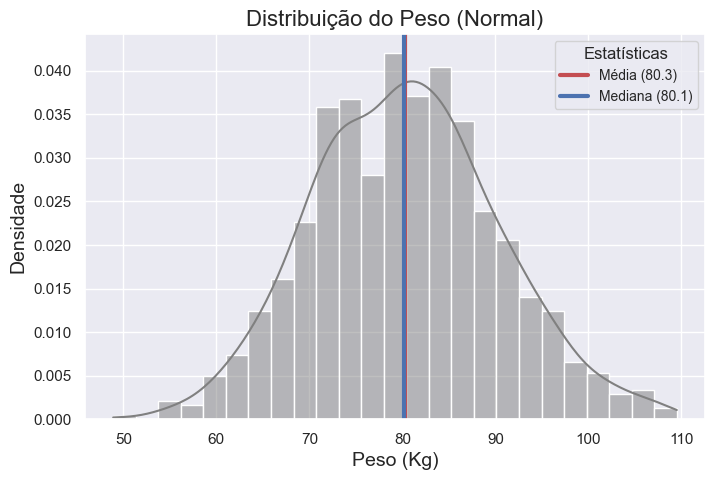

In [155]:
#Criando um dataframe auxiliar para plotar o histograma
df_aux = df.select(
    pl.col('peso')
)

#Calculando a média e a mediana
v_media = np.mean(df_aux.to_numpy())
v_mediana = np.median(df_aux.to_numpy())

#Plotando o histograma
plt.figure(figsize=(8, 5))
ax = sns.histplot(df_aux, x='peso', kde=True, bins=25, stat='density', color='gray', alpha=0.5)

#Plotando a média e a mediana
ax.axvline(
    x = v_media,
    ymin = 0, 
    ymax = 1,
    color = 'r',
    linestyle = '-', 
    linewidth=3,
    label = f'Média ({v_media:.1f})'
)

ax.axvline(
    x = v_mediana, 
    ymin = 0, 
    ymax = 1, 
    color = 'b', 
    linestyle = '-', 
    linewidth=3, 
    label = f'Mediana ({v_mediana:.1f})'
)

#Configurando legenda e labels
ax.set_title('Distribuição do Peso (Normal)', fontsize=16)
ax.xaxis.set_label_text('Peso (Kg)', fontsize=14)
ax.yaxis.set_label_text('Densidade', fontsize=14)
ax.legend(title='Estatísticas', fontsize=10, title_fontsize=12)

plt.plot()

Uma das principais propriedades da distribuição normal é que ela é completamente definida por dois parâmetros: a média e o desvio padrão. A média representa o valor central da distribuição, enquanto o desvio padrão indica o quanto os valores se afastam da média. Essa relação entre a média e o desvio padrão permite que a distribuição normal seja usada para descrever e modelar uma ampla variedade de fenômenos naturais e sociais.

A distribuição normal tem uma série de propriedades importantes, entre elas:

- A área sob a curva é igual a 1.
- A curva é simétrica em torno da média.
- 68,5% dos valores estão a um desvio padrão da média.
- 95% dos valores estão a dois desvios padrão da média.
- 99,7% dos valores estão a três desvios padrão da média.

[]

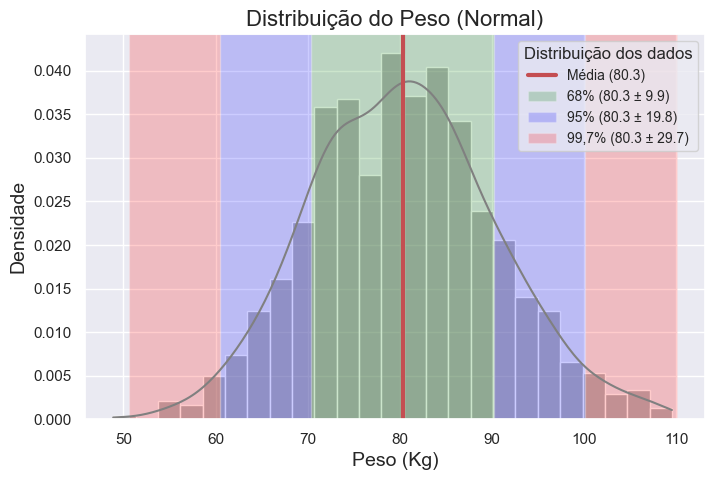

In [176]:
#Criando um dataframe auxiliar para plotar o histograma
df_aux = df.select(
    pl.col('peso')
)

#Calculando a média e a mediana
v_media = np.mean(df_aux.to_numpy())
desvio_padrao = np.std(df_aux.to_numpy())

#Plotando o histograma
plt.figure(figsize=(8, 5))
ax = sns.histplot(df_aux, x='peso', kde=True, bins=25, stat='density', color='gray', alpha=0.5)

#Plotando a média e a mediana
ax.axvline(
    x = v_media,
    ymin = 0, 
    ymax = 1,
    color = 'r',
    linestyle = '-', 
    linewidth=3,
    label = f'Média ({v_media:.1f})'
)

plt.axvspan(
    xmin=v_media-desvio_padrao, 
    xmax=v_media+desvio_padrao, 
    facecolor='green', 
    alpha=0.2, 
    label= f'68% ({v_media:.1f} ± {desvio_padrao:.1f})'
)

plt.axvspan(
    xmin=v_media-desvio_padrao*2, 
    xmax=v_media-desvio_padrao, 
    facecolor='blue', 
    alpha=0.2, 
    label= f'95% ({v_media:.1f} ± {desvio_padrao*2:.1f})'
)


plt.axvspan(
    xmin=v_media+desvio_padrao, 
    xmax=v_media+desvio_padrao*2, 
    facecolor='blue', 
    alpha=0.2
)

plt.axvspan(
    xmin=v_media-desvio_padrao*3, 
    xmax=v_media-desvio_padrao*2, 
    facecolor='red', 
    alpha=0.2, 
    label= f'99,7% ({v_media:.1f} ± {desvio_padrao*3:.1f})'
)


plt.axvspan(
    xmin=v_media+desvio_padrao*2, 
    xmax=v_media+desvio_padrao*3, 
    facecolor='red', 
    alpha=0.2
)


#Configurando legenda e labels
ax.set_title('Distribuição do Peso (Normal)', fontsize=16)
ax.xaxis.set_label_text('Peso (Kg)', fontsize=14)
ax.yaxis.set_label_text('Densidade', fontsize=14)
ax.legend(title='Distribuição dos dados', fontsize=10, title_fontsize=12)

plt.plot()

Quando tenho uma distribuição que não é normal a média e a mediana não são iguais. A mediana irá separar os dados em duas partes iguais (50% dos dados serão maiores ou iguais a mediana e 50% serão menores ou iguais), enquanto a média irá se deslocar para o lado da cauda mais longa.

[]

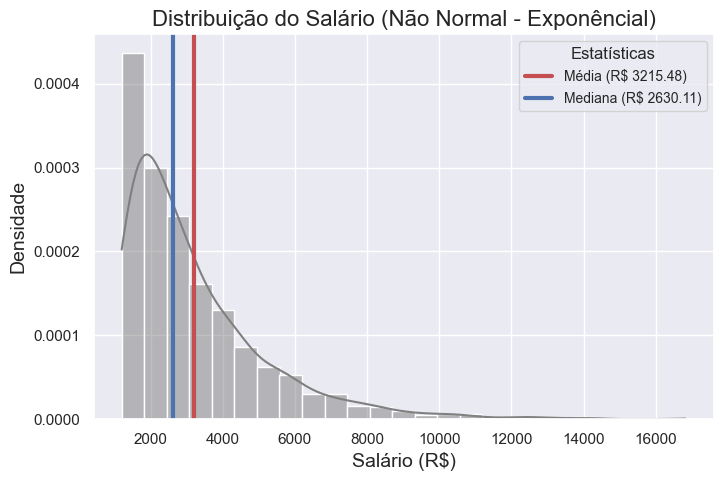

In [181]:
#Criando um dataframe auxiliar para plotar o histograma
df_aux = df.select(
    pl.col('salario')
)

#Calculando a média e a mediana
v_media = np.mean(df_aux.to_numpy())
v_mediana = np.median(df_aux.to_numpy())

#Plotando o histograma
plt.figure(figsize=(8, 5))
ax = sns.histplot(df_aux, x='salario', kde=True, bins=25, stat='density', color='gray', alpha=0.5)

#Plotando a média e a mediana
ax.axvline(
    x = v_media,
    ymin = 0, 
    ymax = 1,
    color = 'r',
    linestyle = '-', 
    linewidth=3,
    label = f'Média (R$ {v_media:.2f})'
)

ax.axvline(
    x = v_mediana, 
    ymin = 0, 
    ymax = 1, 
    color = 'b', 
    linestyle = '-', 
    linewidth=3, 
    label = f'Mediana (R$ {v_mediana:.2f})'
)

#Configurando legenda e labels
ax.set_title('Distribuição do Salário (Não Normal - Exponêncial)', fontsize=16)
ax.xaxis.set_label_text('Salário (R$)', fontsize=14)
ax.yaxis.set_label_text('Densidade', fontsize=14)
ax.legend(title='Estatísticas', fontsize=10, title_fontsize=12)

plt.plot()

## 2.3 Medidas de Dispersão

As medidas de dispersão são medidas que representam o quão dispersos os dados estão em relação à média. As principais medidas de dispersão são a variância e o desvio padrão.

A variância é a média dos quadrados dos desvios em relação à média.

$$\text{{Var}}(X) = \frac{{\sum (x_i - \mu)^2}}{{N}}$$

Já o desvio padrão é a raiz quadrada da variância.

$$\text{{Desvio Padrão}}(X) = \sqrt{{\text{{Var}}(X)}}$$

A letra grega que representa o desvio padrão é o sigma ($\sigma$).

In [189]:
var = df.select(
    pl.col('peso')
).var().row(0)

print(f"A Variância do peso é: {var[0]:.2f} Kg")

A Variância do peso é: 98.30 Kg


In [190]:
dp = df.select(
    pl.col('peso')
).std().row(0)

#outra forma de calcular o desvio padrão
dp = np.sqrt(var)

print(f"O Desvio Padrão do peso é: {dp[0]:.2f} Kg")

O Desvio Padrão do peso é: 9.91 Kg


Quanto maior o desvio padrão, mais dispersos os dados estão em relação à média. Quanto menor o desvio padrão, mais próximos os dados estão da média.